In [2]:
import pandas as pd

In [70]:
from pandas import DataFrame

In [3]:
import matplotlib.pyplot as plt

In [41]:
import seaborn as sns

In [28]:
import numpy as np

In [42]:
from matplotlib.legend_handler import HandlerLine2D

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
from sklearn.model_selection import train_test_split

In [36]:
from sklearn.metrics import roc_curve, auc

In [8]:
home_file=pd.read_csv('breast.csv')

In [9]:
home_file.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [67]:
home_file['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [10]:
home_file.shape

(569, 33)

In [11]:
home_file.keys()

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [12]:
X=home_file.drop(['diagnosis', 'Unnamed: 32'], axis=1)

In [13]:
y=home_file.diagnosis.map(dict(M=1,B=0))

In [65]:
home_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [14]:
y.dtype

dtype('int64')

In [15]:
print(y.tail())

564    1
565    1
566    1
567    1
568    0
Name: diagnosis, dtype: int64


In [16]:
X.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
X.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


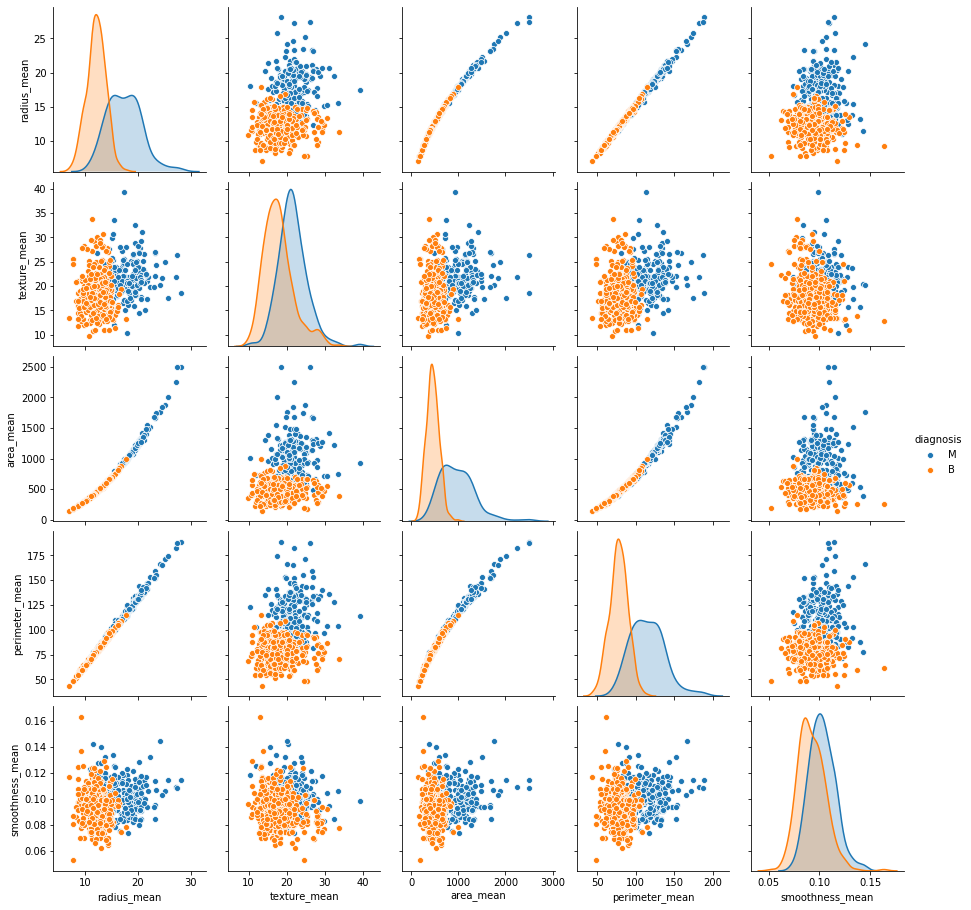

In [18]:
sns.pairplot(home_file, hue='diagnosis', vars= ['radius_mean', 'texture_mean','area_mean','perimeter_mean','smoothness_mean'])

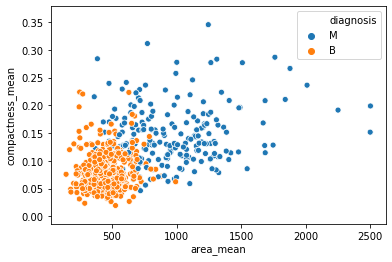

In [19]:
sns.scatterplot(x='area_mean', y='compactness_mean', hue='diagnosis', data=home_file)

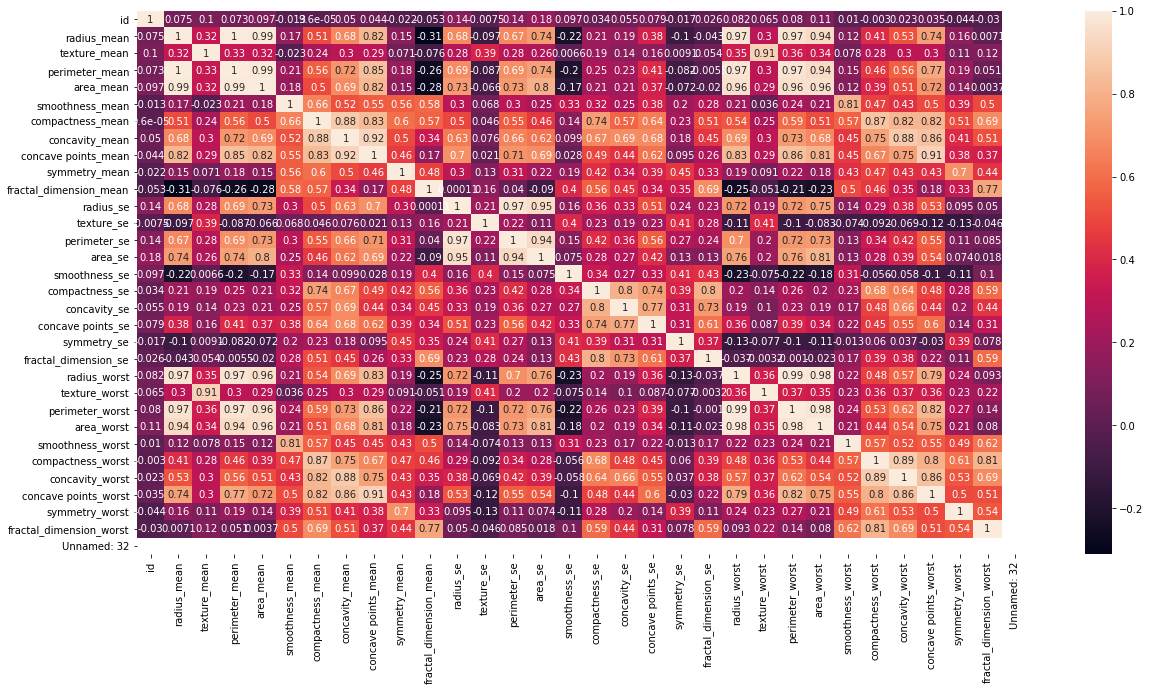

In [20]:
plt.figure(figsize=(20,10))
sns.heatmap(home_file.corr(), annot=True)

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y, random_state=0)

In [22]:
X_train.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
293,891703,11.85,17.46,75.54,432.7,0.08372,0.05642,0.026880,0.022800,0.1875,...,13.06,25.75,84.35,517.8,0.1369,0.17580,0.13160,0.09140,0.3101,0.07007
332,897132,11.22,19.86,71.94,387.3,0.10540,0.06779,0.005006,0.007583,0.1940,...,11.98,25.78,76.91,436.1,0.1424,0.09669,0.01335,0.02022,0.3292,0.06522
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.144000,0.097910,0.1752,...,23.69,38.25,155.00,1731.0,0.1166,0.19220,0.32150,0.16280,0.2572,0.06637
278,8911800,13.59,17.84,86.24,572.3,0.07948,0.04052,0.019970,0.012380,0.1573,...,15.50,26.10,98.91,739.1,0.1050,0.07622,0.10600,0.05185,0.2335,0.06263
489,913535,16.69,20.20,107.10,857.6,0.07497,0.07112,0.036490,0.023070,0.1846,...,19.18,26.56,127.30,1084.0,0.1009,0.29200,0.24770,0.08737,0.4677,0.07623


In [23]:
y_test[:5]

512    1
457    0
439    0
298    0
37     0
Name: diagnosis, dtype: int64

In [24]:
my_model=RandomForestClassifier(n_estimators=100,random_state=0)

In [31]:
my_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [32]:
y_prediction=my_model.predict(X_test)

In [33]:
np.mean(y_prediction==y_test)

0.9790209790209791

In [34]:
my_model.score(X_test,y_test)

0.9790209790209791

In [35]:
my_model.score(X_train,y_train)

1.0

In [37]:
#to check the auc for the random_forest without tunning
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test, y_prediction)

In [38]:
roc_auc=auc(false_positive_rate, true_positive_rate)

In [39]:
roc_auc

0.979454926624738

In [40]:
#to checkmate overfitting, we try to see the best number of estimators or finetune our model
n_estimators=[1,2,4,8,16,32,64,100,200]

train_results=[]
test_results=[]
for estimator in n_estimators:
    my_model=RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
    my_model.fit(X_train, y_train)
    
    y_prediction1=my_model.predict(X_train) #we are monitoring the curve for predicting X_train values for different estimators
    
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_train, y_prediction1)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    
    train_results.append(roc_auc)
    
    
    y_prediction2=my_model.predict(X_test) # NOW, we are monitoring the curve for predicting X_test values for different estimators
    
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test, y_prediction2)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    
    test_results.append(roc_auc)
    
    
    

In [44]:
test_results

[0.9250524109014675,
 0.9172955974842767,
 0.9533542976939203,
 0.9644654088050315,
 0.9550314465408805,
 0.9550314465408805,
 0.9644654088050315,
 0.960587002096436,
 0.9644654088050315]

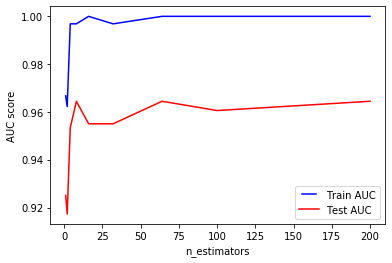

In [43]:
line1,=plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2,=plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1:HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

In [49]:
#lets see the range we need to consider in choosing our max_depth
max_depths=np.linspace(1,32,32, endpoint=True)

train_results=[]
test_results=[]
for max_depth in max_depths:
    my_model=RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
    my_model.fit(X_train, y_train)
    
    y_prediction1=my_model.predict(X_train) #we are monitoring the curve for predicting X_train values for different estimators
    
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_train, y_prediction1)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    
    train_results.append(roc_auc)
    
    
    y_prediction2=my_model.predict(X_test) # NOW, we are monitoring the curve for predicting X_test values for different estimators
    
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test, y_prediction2)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    
    test_results.append(roc_auc)
    
    
    

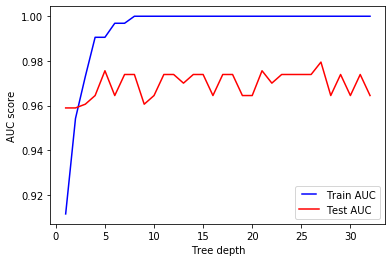

In [48]:
line1,=plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2,=plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1:HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

In [59]:
my_model=RandomForestClassifier(n_estimators=100,max_depth=3, n_jobs=-1)
my_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [60]:
y_prediction2=my_model.predict(X_test)

In [69]:
y_prediction2

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [61]:
my_model.score(X_test,y_test)

0.965034965034965

In [62]:
my_model.score(X_train,y_train)

0.9788732394366197

In [71]:
y_new=my_model.predict(X)

In [72]:
y_new

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [74]:
new_table=pd.DataFrame({'id':home_file['id'],'diagnosis':y_new} )

In [75]:
new_table.head()

,id,diagnosis
0,842302,1
1,842517,1
2,84300903,1
3,84348301,1
4,84358402,1
